# Import data :

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv", delimiter=',', encoding = "utf-8" )

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

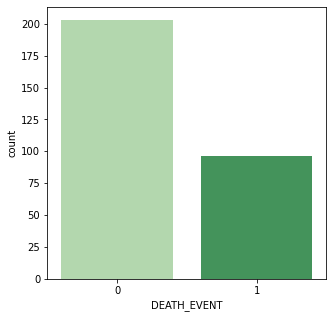

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(x= data["DEATH_EVENT"], palette= 'Greens')

In [7]:
corr = data.corr()

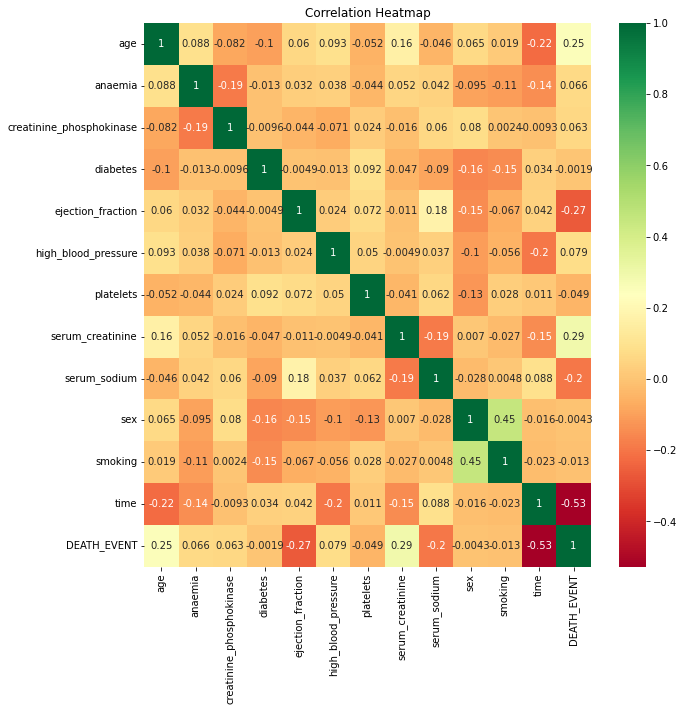

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Heatmap");

# Data preprocessing :

In [9]:
#Checking for Duplicates
data.duplicated().sum()

0

In [10]:
#Checking for Nulls
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Handling outliers

<AxesSubplot:xlabel='ejection_fraction'>

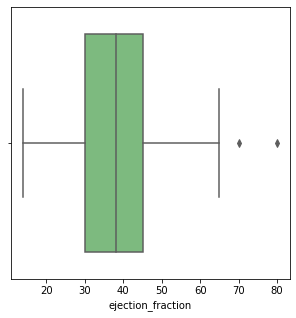

In [11]:
plt.figure(figsize=(5,5))
sns.boxplot(x = data.ejection_fraction, palette = "Greens")

In [12]:
x=data[data['ejection_fraction']>=65]
x.shape

(3, 13)

In [13]:
data=data[data['ejection_fraction']<65]

<AxesSubplot:xlabel='serum_creatinine'>

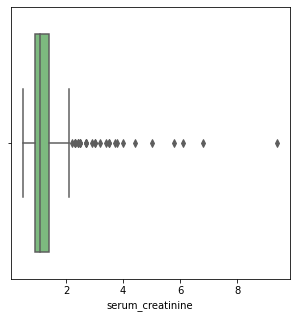

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(x = data.serum_creatinine, palette = "Greens")

<AxesSubplot:xlabel='time'>

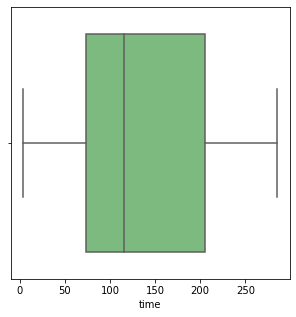

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot(x = data.time, palette = "Greens")

splitting

In [16]:
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [17]:
from sklearn.model_selection import train_test_split

#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(222, 12)
(74, 12)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       296 non-null    float64
 1   anaemia                   296 non-null    int64  
 2   creatinine_phosphokinase  296 non-null    int64  
 3   diabetes                  296 non-null    int64  
 4   ejection_fraction         296 non-null    int64  
 5   high_blood_pressure       296 non-null    int64  
 6   platelets                 296 non-null    float64
 7   serum_creatinine          296 non-null    float64
 8   serum_sodium              296 non-null    int64  
 9   sex                       296 non-null    int64  
 10  smoking                   296 non-null    int64  
 11  time                      296 non-null    int64  
 12  DEATH_EVENT               296 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.4 KB


Scaling data

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)

MinMaxScaler()

In [22]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Build machine learning model :

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras import callbacks

In [24]:
# Adding layers 
model = Sequential()
model.add(Dense(13, activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(13, activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # Output layer

In [25]:
#Compiling the moodel 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['Accuracy'])

# Train the ML model :

In [26]:
earlystopping = callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [27]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 32, epochs = 150, callbacks =[earlystopping])

Epoch 1/150
7/7 [==============================] - 4s 133ms/step - loss: 0.6777 - Accuracy: 0.5676 - val_loss: 0.6721 - val_Accuracy: 0.6757
Epoch 2/150
7/7 [==============================] - 0s 28ms/step - loss: 0.6716 - Accuracy: 0.6351 - val_loss: 0.6615 - val_Accuracy: 0.6757
Epoch 3/150
7/7 [==============================] - 0s 24ms/step - loss: 0.6416 - Accuracy: 0.6441 - val_loss: 0.6525 - val_Accuracy: 0.6622
Epoch 4/150
7/7 [==============================] - 0s 24ms/step - loss: 0.6494 - Accuracy: 0.6577 - val_loss: 0.6451 - val_Accuracy: 0.6622
Epoch 5/150
7/7 [==============================] - 0s 22ms/step - loss: 0.6389 - Accuracy: 0.6577 - val_loss: 0.6394 - val_Accuracy: 0.6622
Epoch 6/150
7/7 [==============================] - 0s 21ms/step - loss: 0.6257 - Accuracy: 0.7072 - val_loss: 0.6344 - val_Accuracy: 0.6622
Epoch 7/150
7/7 [==============================] - 0s 22ms/step - loss: 0.6183 - Accuracy: 0.6847 - val_loss: 0.6306 - val_Accuracy: 0.6622
Epoch 8/150
7/7 [==

# Evaluation

In [28]:
from matplotlib import pyplot as pp

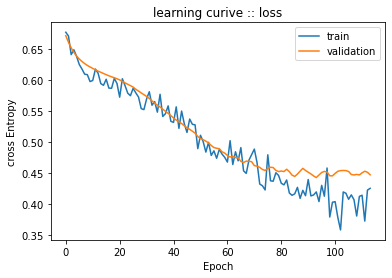

In [29]:
pp.title('learning curive :: loss')
pp.xlabel('Epoch')
pp.ylabel('cross Entropy')
pp.plot(history.history['loss'],label="train")
pp.plot(history.history['val_loss'],label="validation")
pp.legend()
pp.show()

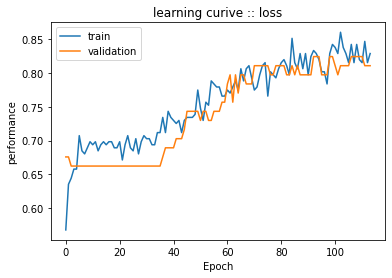

In [30]:
pp.title('learning curive :: loss')
pp.xlabel('Epoch')
pp.ylabel('performance')
pp.plot(history.history['Accuracy'],label="train")
pp.plot(history.history['val_Accuracy'],label="validation")
pp.legend()
pp.show()

In [45]:
y_pred = (model.predict(X_test)>0.5)

3/3 [==============================] - 0s 7ms/step


In [46]:
from sklearn.metrics import accuracy_score

model_acc = round(accuracy_score(y_pred,y_test) * 100, 2)
print(model_acc,'%')

81.08 %


In [33]:
#thanks